<a href="https://colab.research.google.com/github/rich-hyun/machine_learning_military/blob/main/%EC%9D%BC%EC%B0%A8%EB%B3%84/day3_zsecond_guess_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving project_proof2.xlsx to project_proof2 (39).xlsx
[1.]


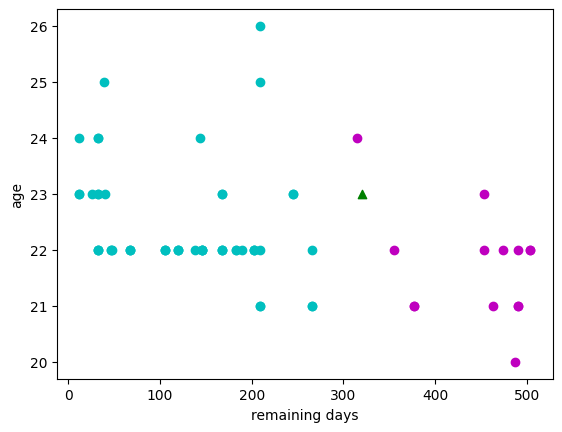

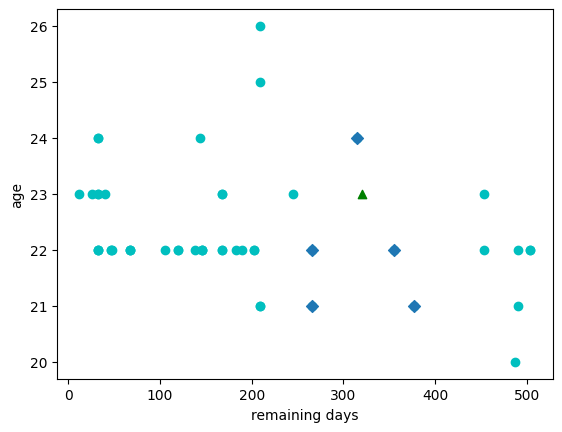

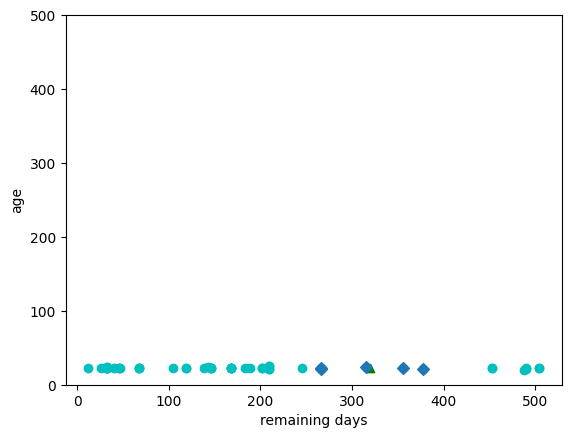

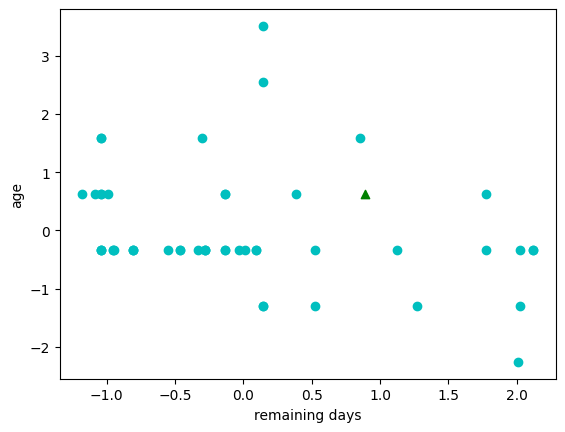

[0.]


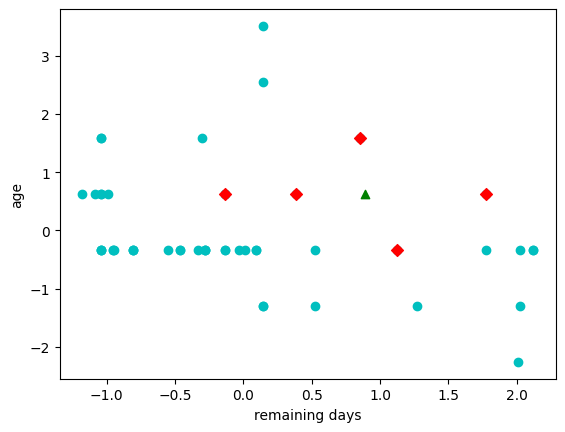

In [45]:
from google.colab import files
uploaded=files.upload()

import pandas as pd
workbook=pd.read_excel('project_proof2.xlsx')
base=workbook.to_numpy()

import matplotlib.pyplot as plt

"""넘파이로 데이터 준비하기"""
age=[]
for k in range(66):
  age.append(base[k][1])
rdays=[]
for k in range(66):
  rdays.append(base[k][3])

base_data=[[l,w] for l,w in zip(age,rdays)]
base_target=[1]*52+[0]*14

import numpy as np
from sklearn.model_selection import train_test_split

base_data=np.column_stack((age,rdays))
base_target=np.concatenate((np.ones(52),np.zeros(14)))

train_input,test_input,train_target,test_target=train_test_split(
    base_data,base_target,stratify=base_target, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input, test_target)

print(kn.predict([[23,320]]))

import matplotlib.pyplot as plt
plt.scatter(base[:52,[1]],base[:52,[3]],color='c')
plt.scatter(base[52:,[1]],base[52:,[3]],color='m')
plt.scatter(320, 23, marker='^',color='g')
plt.xlabel('remaining days')
plt.ylabel('age')
plt.show()

distances,indexes=kn.kneighbors([[320,23]])
plt.scatter(train_input[:,0],train_input[:,1], color='c')
plt.scatter(320, 23, marker='^',color='g')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('remaining days')
plt.ylabel('age')
plt.show()

plt.scatter(train_input[:,0],train_input[:,1], color='c')
plt.scatter(320, 23, marker='^',color='g')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.ylim((0,500))
plt.xlabel('remaining days')
plt.ylabel('age')
plt.show()

mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)
train_scaled=(train_input-mean)/std

new=([320,23]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1], color='c')
plt.scatter(new[0],new[1], marker='^',color='g')
plt.xlabel('remaining days')
plt.ylabel('age')
plt.show()

kn.fit(train_scaled,train_target)
test_scaled=(test_input-mean)/std
kn.score(test_scaled,test_target)

print(kn.predict([new]))

distances,indexes=kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1], color='c')
plt.scatter(new[0],new[1], marker='^',color='g')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D',color='r')
plt.xlabel('remaining days')
plt.ylabel('age')
plt.show()